In [41]:
#!/home/anuj.mishra/anaconda3/envs/igwn-py39/bin/python3

import numpy as np
from time import time
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
mpl.rcprms['figure.figsize'] = (12.0, 7.0)
mpl.rcprms['text.usetex'] = True
mpl.rcprms['font.size'] = 22
mpl.rcprms['xtick.labelsize'] = 22.0
mpl.rcprms['ytick.labelsize'] = 22.0
mpl.rcprms['lines.markersize'] = 10.0
mpl.rcprms['axes.axisbelow'] = True
mpl.rcprms['font.family'] = 'serif'
mpl.rcprms['font.serif'] = 'Computer Modern'

import gwmat
lgw = gwmat.GWMAT()  # creating an instance of the master class containg all the classes in GWMAT.

pure_polarized_wfs : {'hp': <pycbc.types.timeseries.TimeSeries object at 0x7f018e2dee20>, 'hc': <pycbc.types.timeseries.TimeSeries object at 0x7f018375a5b0>}
pure_ifo_signal : {'H1': <pycbc.types.timeseries.TimeSeries object at 0x7f018d585eb0>, 'L1': <pycbc.types.timeseries.TimeSeries object at 0x7f018d6986a0>, 'V1': <pycbc.types.timeseries.TimeSeries object at 0x7f018e2abdc0>}
noisy_ifo_signal : {'H1': <pycbc.types.timeseries.TimeSeries object at 0x7f018d585eb0>, 'L1': <pycbc.types.timeseries.TimeSeries object at 0x7f018d6986a0>, 'V1': <pycbc.types.timeseries.TimeSeries object at 0x7f018e2abdc0>}
psd : {'H1': <pycbc.types.frequencyseries.FrequencySeries object at 0x7f0183adbd30>, 'L1': <pycbc.types.frequencyseries.FrequencySeries object at 0x7f018e2def10>, 'V1': <pycbc.types.frequencyseries.FrequencySeries object at 0x7f01835e6820>}
signal_templates : {'H1': <pycbc.types.timeseries.TimeSeries object at 0x7f0184ba2700>, 'L1': <pycbc.types.timeseries.TimeSeries object at 0x7f018fa34490>

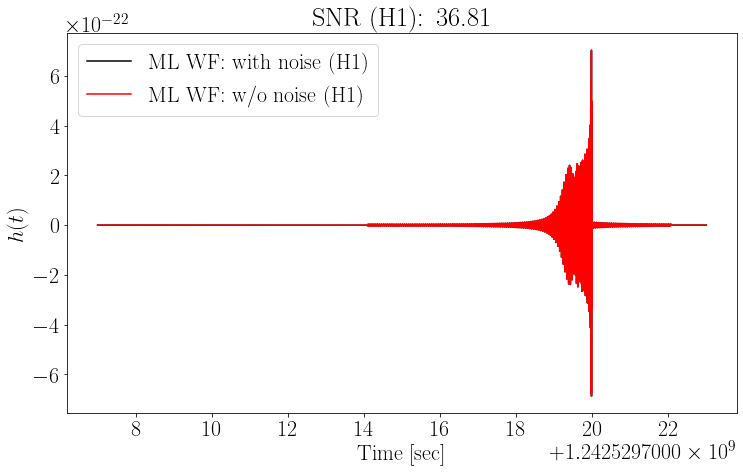

{'H1': 36.814465716717464, 'L1': 35.26702013978259, 'V1': 8.175464689267383}
Net SNR: 51.63


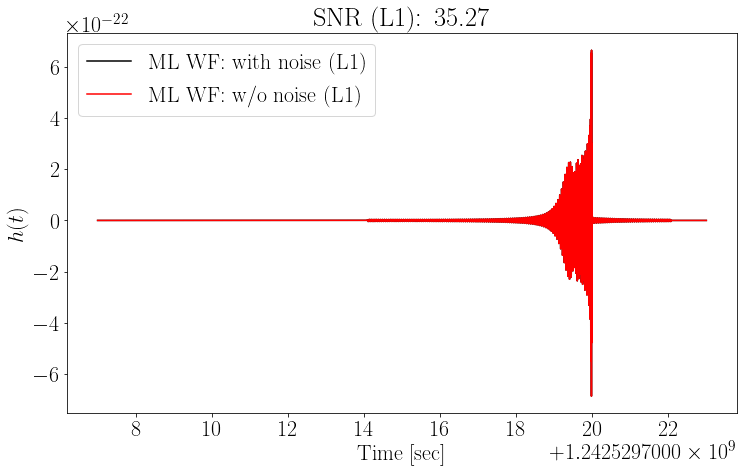

{'H1': 36.814465716717464, 'L1': 35.26702013978259, 'V1': 8.175464689267383}
Net SNR: 51.63


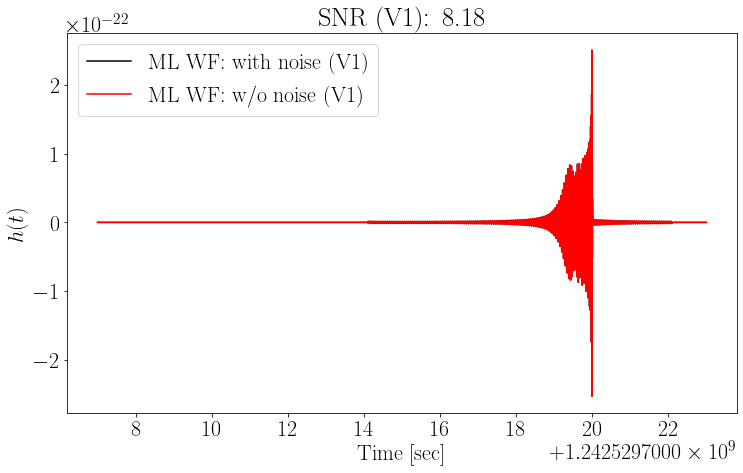

{'H1': 36.814465716717464, 'L1': 35.26702013978259, 'V1': 8.175464689267383}
Net SNR: 51.63


In [46]:
# Microlensed WF generation with noise
m1=m2=30
init_prms = dict(f_low=20., f_high=None, f_ref=20., sample_rate=2048, wf_approximant="IMRPhenomXPHM", ifo_list=['H1', 'L1', 'V1'] )
psd_prms = dict(Noise=False, psd_H1='O4', psd_L1='O4', psd_V1='O4', gen_seed=0)
lens_prms = dict(m_lens=0, y_lens=0.1, z_lens=0)  # (m_lens=0 means unlensed)
cbc_prms = dict(mass_1=m1, mass_2=m2, a_1=0, a_2=0, tilt_1=0, tilt_2=0, phi_12=0, phi_jl=0, 
                luminosity_distance=1000, ra=3.14, dec=0.785, theta_jn=0, polarization=0,
                coa_phase=0, rwrap=-2.1, trigger_time=1242529720)
misc_prms = dict(extra_padding_at_start=0, extra_padding_at_end=0, )
                #    save_data=False, data_outdir = './', data_label=None, data_channel='PyCBC-Injection')  
prms = {**init_prms, **lens_prms, **cbc_prms, **psd_prms, **misc_prms}
res = lgw.injection.simulated_injection_with_complete_data(**prms)

lgw.general_utils.print_dict(res)

for ifo in prms['ifo_list']:
    mlwf_with_noise = res['noisy_ifo_signal'][ifo]
    mlwf_without_noise = res['pure_ifo_signal'][ifo] 
    snr_ifo = res['optimal_snr'][ifo] 

    plt.plot(mlwf_with_noise.sample_times, mlwf_with_noise, color='black', linestyle='solid', label='ML WF: with noise ('+ifo+')')
    plt.plot(mlwf_without_noise.sample_times, mlwf_without_noise, color='red', linestyle='solid', label='ML WF: w/o noise ('+ifo+')')   
    plt.title('SNR ('+ifo+'): {:.2f}'.format(snr_ifo))
    plt.xlabel('Time [sec]')
    plt.ylabel('$h(t)$')
    plt.legend()
    plt.show()

    net_SNR = res['network_optimal_snr']  #np.linalg.norm([res['optimal_snr_H1'], res['optimal_snr_L1'], res['optimal_snr_V1']])
    #print('SNRs: {{H1: {:.2f}, L1: {:.2f}, V1: {:.2f}}}'.format(res['optimal_snr_H1'], res['optimal_snr_L1'], res['optimal_snr_V1'], net_SNR))
    print(res['optimal_snr'])
    print('Net SNR: {:.2f}'.format(net_SNR))

pure_polarized_wfs : {'hp': <pycbc.types.timeseries.TimeSeries object at 0x7f0183add4f0>, 'hc': <pycbc.types.timeseries.TimeSeries object at 0x7f0183adde50>}
pure_ifo_signal : {'H1': <pycbc.types.timeseries.TimeSeries object at 0x7f0184b8b370>, 'L1': <pycbc.types.timeseries.TimeSeries object at 0x7f018478a760>, 'V1': <pycbc.types.timeseries.TimeSeries object at 0x7f018478aee0>}
noisy_ifo_signal : {'H1': <pycbc.types.timeseries.TimeSeries object at 0x7f01847abdc0>, 'L1': <pycbc.types.timeseries.TimeSeries object at 0x7f0184b97af0>, 'V1': <pycbc.types.timeseries.TimeSeries object at 0x7f0183748e50>}
psd : {'H1': <pycbc.types.frequencyseries.FrequencySeries object at 0x7f0183a22dc0>, 'L1': <pycbc.types.frequencyseries.FrequencySeries object at 0x7f018477a340>, 'V1': <pycbc.types.frequencyseries.FrequencySeries object at 0x7f0183748d00>}
signal_templates : {'H1': <pycbc.types.timeseries.TimeSeries object at 0x7f0184b9cf70>, 'L1': <pycbc.types.timeseries.TimeSeries object at 0x7f018372d4c0>

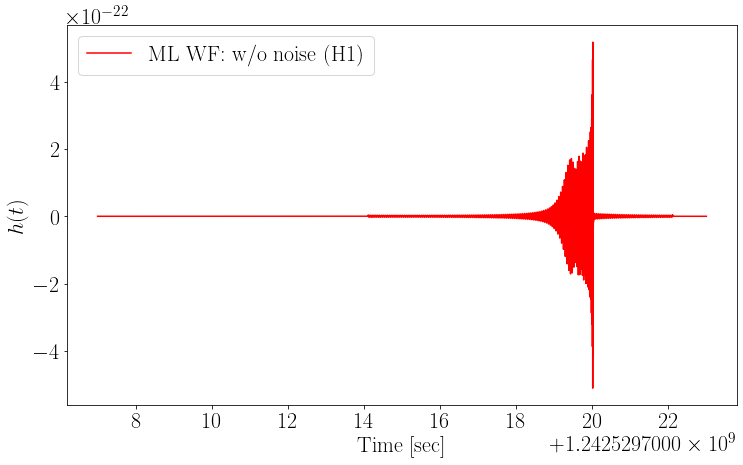

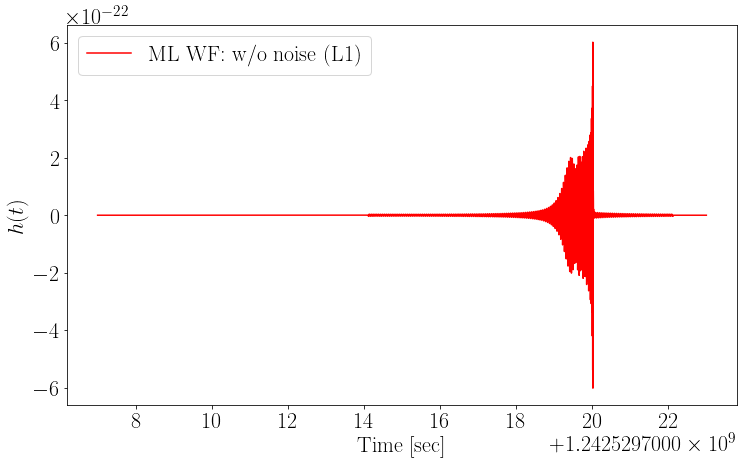

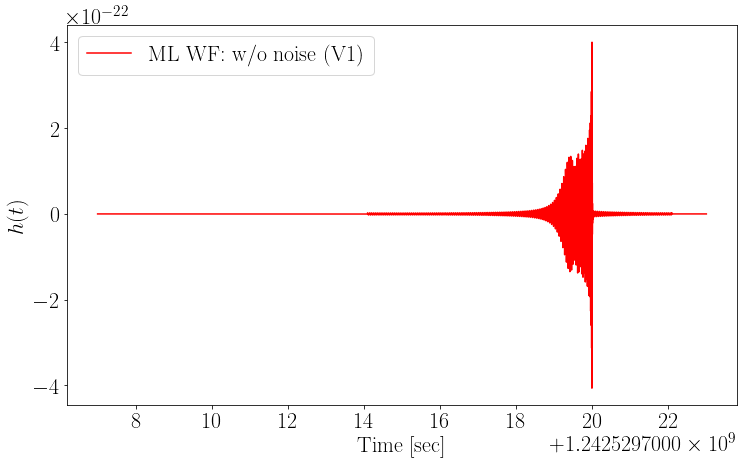

In [44]:
# Microlensed WF generation with noise
m1=m2=30
init_prms = dict(f_low=20., f_high=None, f_ref=20., sample_rate=2048, wf_approximant="IMRPhenomXPHM", ifo_list=['H1', 'L1', 'V1'] )
psd_prms = dict(Noise=True, psd_H1='O4', psd_L1='O4', psd_V1='O4', gen_seed=0)
lens_prms = dict(m_lens=0, y_lens=0.1, z_lens=0)  # (m_lens=0 means unlensed)
cbc_prms = dict(mass_1=m1, mass_2=m2, a_1=0, a_2=0, tilt_1=0, tilt_2=0, phi_12=0, phi_jl=0, 
                luminosity_distance=1000, ra=0, dec=0.0, theta_jn=0, polarization=0,
                coa_phase=0, rwrap=-2.1, trigger_time=1242529720)
misc_prms = dict(extra_padding_at_start=0, extra_padding_at_end=0, )
                #    save_data=False, data_outdir = './', data_label=None, data_channel='PyCBC-Injection')  
prms = {**init_prms, **lens_prms, **cbc_prms, **psd_prms, **misc_prms}
# res = lgw.injection.simulated_zero_noise_injection(**prms)
res = lgw.injection.simulated_injection_with_complete_data(**prms)

lgw.general_utils.print_dict(res)

for ifo in prms['ifo_list']:
    mlwf_without_noise = res['pure_ifo_signal'][ifo] 

    plt.plot(mlwf_without_noise.sample_times, mlwf_without_noise, color='red', linestyle='solid', label='ML WF: w/o noise ('+ifo+')')   
    # plt.title('SNR ('+ifo+'): {:.2f}'.format(snr_ifo))
    plt.xlabel('Time [sec]')
    plt.ylabel('$h(t)$')
    plt.legend()
    plt.show()

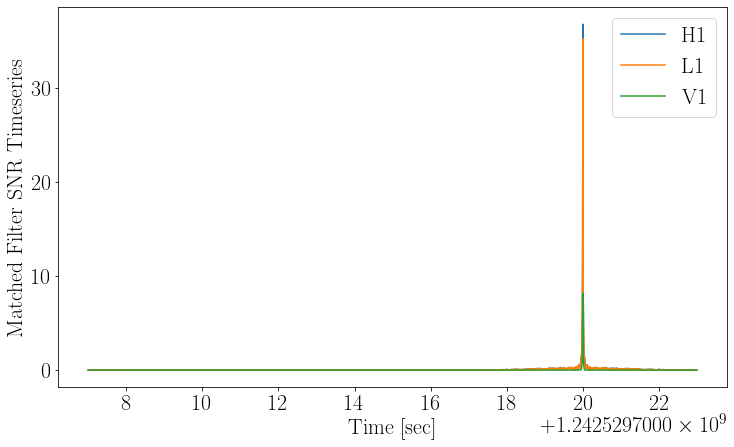

In [47]:
for ifo in prms['ifo_list']:
    wf = res['matched_filter_snr_timeseries'][ifo]
    plt.plot(wf.sample_times, np.abs(wf), label=ifo)
plt.xlabel('Time [sec]')
plt.ylabel('Matched Filter SNR Timeseries')    
plt.legend()    
plt.show()    

In [96]:
end_time = prms['trigger_time']
res_data = lgw.injection.generate_gw_polarizations_hp_hc(**prms)

hp = res_data['hp_TD_Unlensed']
hc = res_data['hc_TD_Unlensed']        
if 'm_lens' in prms.keys():
    if prms['m_lens'] != 0:
        hp = res_data['hp_TD_Lensed']
        hc = res_data['hc_TD_Lensed']
hp.start_time += end_time
hc.start_time += end_time

# projection onto detectors
det = dict()
ifo_signal = dict()
for ifo in prms['ifo_list']:
    det[ifo] = Detector(ifo)
    ifo_signal[ifo] = det[ifo].project_wave(hp, hc, prms['ra'], prms['dec'], prms['polarization'])
    ifo_signal[ifo] = waveform.utils.taper_timeseries(ifo_signal[ifo], tapermethod='TAPER_STARTEND', return_lal=False)  #remove edge effects

# We modify the length of the WF so that its time starts and ends in integer seconds. 
# For this, we first make ends integer then add some extra seconds towards the end and the start.
for ifo in prms['ifo_list']:
    wf = deepcopy( ifo_signal[ifo] )
    wf = lgw.injection.modify_signal_start_time(wf, extra=prms['extra_padding_at_start'], **prms) 
    wf = lgw.injection.modify_signal_end_time(wf, extra=prms['extra_padding_at_end'], **prms) # extra=1 => post-trigger duration is 2 seconds.
    # wf = lgw.injection.adjust_signal_length_to_power_of_2(wf)  # making total segment lenght a power of 2 by adding zeros towards the start of the WF.
    ifo_signal[ifo] = wf
res = dict(pure_polarized_wfs={'hp':hp, 'hc':hc}, pure_ifo_signal=ifo_signal )    

In [97]:
res['pure_ifo_signal']['H1'].sample_times[0], res['pure_ifo_signal']['H1'].sample_times[-1] + 1/res['pure_ifo_signal']['H1'].sample_rate

(1242529714.0, 1242529723.0)

In [107]:
chunk_duration = 20 #int( 3600 * 24 * 0.001 )

# Microlensed WF generation with noise
m1=m2=300
init_prms = dict(f_low=20., f_high=None, f_ref=20., sample_rate=2048, wf_approximant="IMRPhenomXPHM", ifo_list=['H1', 'L1', 'V1'] )
psd_prms = dict(Noise=True,
                psd_H1='/home/anuj.mishra/git_repos/gwmat/gwmat/detector_PSDs/Prod0_H1_psd.dat',
                psd_L1='/home/anuj.mishra/git_repos/gwmat/gwmat/detector_PSDs/Prod0_L1_psd.dat',
                psd_V1='/home/anuj.mishra/git_repos/gwmat/gwmat/detector_PSDs/Prod0_V1_psd.dat',
                gen_seed=0)

cbc_prms = dict(mass_1=m1, mass_2=m2, a_1=0, a_2=0, tilt_1=0, tilt_2=0, phi_12=0, phi_jl=0,
                luminosity_distance=1e10, ra=3.14, dec=0.785, theta_jn=0, polarization=0,
                coa_phase=0, trigger_time=0, #chunk_duration, 
                rwrap=0)
misc_params = dict(extra_padding_at_start=chunk_duration, extra_padding_at_end=1,
                   save_data=True, data_outdir = '/home/anuj.mishra/projects/misc/data/simulated_noise_3day_O3/', data_label=None, data_channel='PyCBC-Injection')
prms = {**init_prms, **cbc_prms, **psd_prms, **misc_params}


In [108]:
end_time = prms['trigger_time']
res_data = lgw.injection.generate_gw_polarizations_hp_hc(**prms)

hp = res_data['hp_TD_Unlensed']
hc = res_data['hc_TD_Unlensed']        
if 'm_lens' in prms.keys():
    if prms['m_lens'] != 0:
        hp = res_data['hp_TD_Lensed']
        hc = res_data['hc_TD_Lensed']
hp.start_time += end_time
hc.start_time += end_time

# projection onto detectors
det = dict()
ifo_signal = dict()
for ifo in prms['ifo_list']:
    det[ifo] = Detector(ifo)
    ifo_signal[ifo] = det[ifo].project_wave(hp, hc, prms['ra'], prms['dec'], prms['polarization'])
    ifo_signal[ifo] = waveform.utils.taper_timeseries(ifo_signal[ifo], tapermethod='TAPER_STARTEND', return_lal=False)  #remove edge effects

# We modify the length of the WF so that its time starts and ends in integer seconds. 
# For this, we first make ends integer then add some extra seconds towards the end and the start.
for ifo in prms['ifo_list']:
    wf = deepcopy( ifo_signal[ifo] )
    wf = lgw.injection.modify_signal_start_time(wf, extra=prms['extra_padding_at_start'], **prms) 
    wf = lgw.injection.modify_signal_end_time(wf, extra=prms['extra_padding_at_end'], **prms) # extra=1 => post-trigger duration is 2 seconds.
    # wf = lgw.injection.adjust_signal_length_to_power_of_2(wf)  # making total segment lenght a power of 2 by adding zeros towards the start of the WF.
    ifo_signal[ifo] = wf
res = dict(pure_polarized_wfs={'hp':hp, 'hc':hc}, pure_ifo_signal=ifo_signal )    

In [109]:
res['pure_ifo_signal']['H1'].sample_times[0], res['pure_ifo_signal']['H1'].sample_times[-1] + 1/res['pure_ifo_signal']['H1'].sample_rate

(-175.09765625, 15.09765625)

In [110]:
hp.sample_times[0], hp.sample_times[-1] + 1/hp.sample_rate

(-8.0, 0.0)

In [116]:
2**17/ (3600 * 24 * 3)

0.505679012345679

In [118]:
2**18 - (3600 * 24 * 3)

2944